In [30]:
import requests
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

In [8]:
driver = webdriver.Chrome('C:\\Users\\Bestc\\Desktop\\빅데이터 지능형 서비스 개발과정(멀티캠퍼스)\\설치프로그램\\Selenium\\chromedriver.exe')
instargram = 'https://www.instagram.com/'
driver.get(instargram)
time.sleep(10)

with open('C:\\Workspace\\python\\Data_Science\\05.웹프로그래밍과 HTML, 크롤링\\password.txt') as f:
    pwd = f.read()
id = 'jeongbeom1996'
input_id = driver.find_element_by_css_selector('._2hvTZ.pexuQ.zyHYP')
input_id.send_keys(id)
input_pwd = driver.find_element_by_name('password')       
input_pwd.send_keys(pwd)
input_pwd.submit()
time.sleep(5)
# 아이디 저장 나중에하기
try:
    driver.find_element_by_css_selector('.sqdOP.yWX7d.y3zKF').click()
    time.sleep(2)
except:
    pass  
# 알림설정 나중에 하기
try:
    driver.find_element_by_css_selector('.aOOlW.HoLwm').click()
    time.sleep(2) 
except:
    pass 
from urllib.parse import quote
keyword = '가을여행'
search_url = 'https://www.instagram.com/explore/tags/'
url = f'{search_url}{quote(keyword)}'
driver.get(url)
time.sleep(5)
driver.find_element_by_css_selector('div._9AhH0').click()
time.sleep(2)


import unicodedata
import re
from tqdm.notebook import tqdm

results = []

for i in tqdm(range(100)):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    try:
        content = soup.select_one('div.C4VMK > span').text
        content = unicodedata.normalize('NFC', content) # ASCII Code로 표현불가능한 이모티콘 등의 언어들을 포함하기 위해 변경
    except:
        content = ' '
        print(i)
    results.append(content)
    driver.find_element_by_css_selector('.coreSpriteRightPaginationArrow').click()
    time.sleep(5)
driver.close()

  0%|          | 0/100 [00:00<?, ?it/s]

In [35]:
len(results)
type(results)
results[0]
type(results)

list

In [39]:
df = pd.DataFrame(list(results), columns = ['contents'])
df

,contents
0,[ 뭐야 여기 네덜란드 아니였나요 - ? 🎡 ]살랑 살랑 풀들과 데크 그리고 풍차의...
1,#더욱그라피이번엔 어떤계절이 내 앞에 올런지😌....#탄도항#바다#노을#풍차#nik...
2,#이벤트⠀우리가 좋아하는밸런스 게 ~ 임 😉⠀여러분의 취향을 저격한 비치타월은?⠀이...
3,진짜 가을 같은 요즘입니다!낮엔 여전히 덥지만...해지면 분명히 피부로 느껴지는가을...
4,가을 하면 “코스모스”드디어 9월이 되었네요가을하면 젤 먼저 코스모스가 생각납니다 ...
...,...
95,🌿..네이버 쏘브리즈🌿창원 어반브릭스 1층 1067호(스타벅스앞)상가에 지하주차장있...
96,#상봉에비뉴가디건은 #남성복 나머지는 #여성복전부 상봉에비뉴 착장🛍
97,.#가평힐링피아캠핑장.사진으로 다 보여 드릴수 없어서 너무 아쉬운 힐링피아 캠핑장!...
98,#산소카페청송 #산소카페청송정원 #날씨망함☔️ #가을여행


In [45]:
import re
df.contents = df.contents.apply(lambda x: re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', x))
df.contents[0]

'  뭐야 여기 네덜란드 아니였나요        살랑 살랑 풀들과 데크 그리고 풍차의 멋진 조화이곳은  인천  소래습지생태공원  소래습지생태공원  인천 남동구 논현동      슬금 슬금 가을 날씨가 찾아오고있잖아요오      색다른 산책코스     해뒀다가 가을되면가을 바람 맞으면서 걸으러 가보쟈요   계곡이나 바다  공원과는 또다른감성이 느껴지는 곳이랍니당 넓은 곳에서 조용히 걸으면서힐링하러 가야죠        운영시간                  입장료   무료  꿀     자전거를 대여해서 다니면 한바퀴 돌아보기 쉬움 산책하기 좋다  소래포구 근처라 산책하고 소래포구가면 개꿀   들개출몰지역니 늦은밤에는 조심하세요                       님의 여행일기장   여행다녀왔습니다 로 남기는 우리들의 여행일기장                                        나의 여행을 제보하고 싶다면     프로필링크 그룹으로 나의 여행 사진에  여행다녀왔습니다 태그 여행다녀왔습니다 에디터가 찾아갑니다                                           지금 대한민국은 수도권 기준  사회적 거리두기  단계 여행시 방역수칙을 준수하고  야외 활동시 마스크 착용은 필수   여행다녀왔습니다 국내  여행다녀왔습니다 인천                 인천  인천여행  인천여행코스  소래습지생태공원  인천여행추천  인천여행코스추천  가을여행  여름여행  인천산책하기좋은곳  인천걷기좋은곳  주말여행  가을여행추천  주말여행추천  주말나들이  서울근교여행  소래포구  생태공원  힐링여행추천  국내여행  국내여행추천'

In [70]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/정직_1.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import konlpy
from PIL import Image
from konlpy.tag import Okt
okt = Okt()
tokens = okt.nouns(df.contents[0])
tokens_list = []
for i in range(len(df.contents)):
    tokens = okt.nouns(df.contents[i])
    tokens_list.extend(tokens)
tokens_list[:10], len(tokens_list)

(['뭐', '여기', '네덜란드', '살랑', '살랑', '풀', '데크', '풍차', '조화', '곳'], 4070)

In [72]:
new_tokens = []
for token in tokens_list:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)
new_tokens[:10]

['뭐', '여기', '네덜란드', '살랑', '살랑', '풀', '데크', '풍차', '조화', '곳']

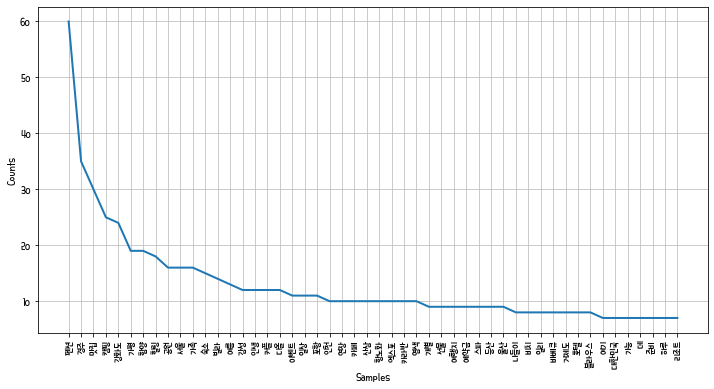

In [78]:
import nltk
stoptext = '''
    여행 곳 코스 추천 박 때 스카이 것 외 수 핫 글 등 그 처음 생각 인 시작 타고 포 중 시간 워 후 제주 이번 초록 계획
    게시판 전 더 일 지역 날 소식 불 이상 저 가을 그램 월 스타 사진 국내 풀 문의 속눈썹 코디 휴가 예약 오늘 데이트 네일
    남자 분 소통 아들 하늘 북 토트 애기 풍경 링크 프로필 키즈 샷 아이 시술
'''
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
travel = nltk.Text(new_tokens, name = '가을여행')
plt.figure(figsize = (12, 6))
travel.plot(50)
plt.show()

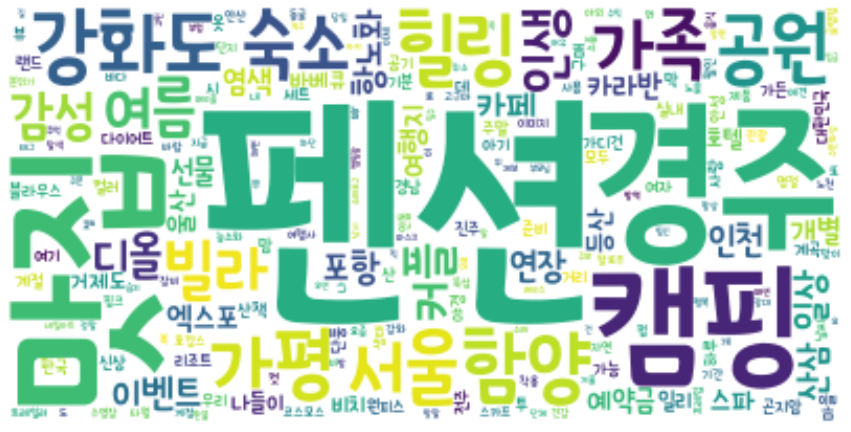

In [79]:
from wordcloud import WordCloud
from PIL import Image
data = travel.vocab().most_common(300)
wc = WordCloud(
    font_path = font_path, relative_scaling = 0.2,
    background_color = 'white'
).generate_from_frequencies(dict(data))
plt.figure(figsize = (15, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()